# LendingClub Dataset

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Data

LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

### Goal

Building a model that can predict wether or nor a borrower will pay back their loan. This way in the future when the company gets a new potential customer they can assess whether or not the customer is likely to pay back the loan.

## 1.0 Setup

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
# Load Feature Information
data_info = pd.read_csv('lending_club_info.csv', index_col = 0)
data_info.T.head()


LoanStatNew,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
Description,The listed amount of the loan applied for by t...,The number of payments on the loan. Values are...,Interest Rate on the loan,The monthly payment owed by the borrower if th...,LC assigned loan grade,LC assigned loan subgrade,The job title supplied by the Borrower when ap...,Employment length in years. Possible values ar...,The home ownership status provided by the borr...,The self-reported annual income provided by th...,...,The month the borrower's earliest reported cre...,The number of open credit lines in the borrowe...,Number of derogatory public records,Total credit revolving balance,"Revolving line utilization rate, or the amount...",The total number of credit lines currently in ...,The initial listing status of the loan. Possib...,Indicates whether the loan is an individual ap...,Number of mortgage accounts.,Number of public record bankruptcies


In [9]:
data_info.T['installment']['Description']

'The monthly payment owed by the borrower if the loan originates.'

In [10]:
# Load Data
df = pd.read_csv('lending_club_loan_two.csv')
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


## 2.0 Exploratory Data Analysis

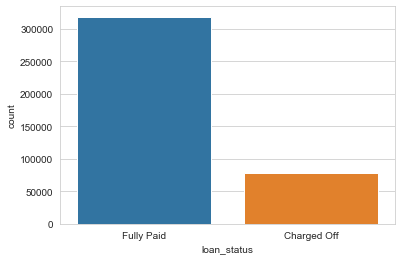

In [13]:
# The Loan Status labels split

sns.set_style('whitegrid')
sns.countplot(x='loan_status', data = df)

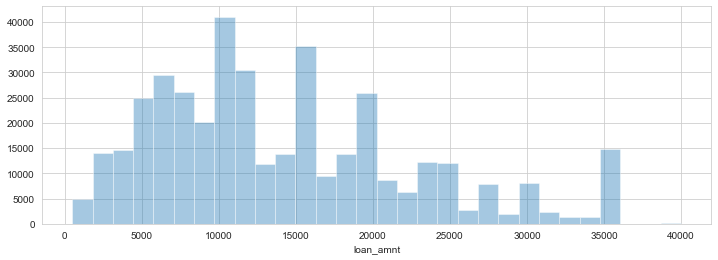

In [14]:
# Distribution of the loan amount

plt.figure(figsize = (12,4))
sns.distplot(df['loan_amnt'], kde = False, bins = 30)

In [15]:
# Correlation between the feature variables
correlation = df.corr()

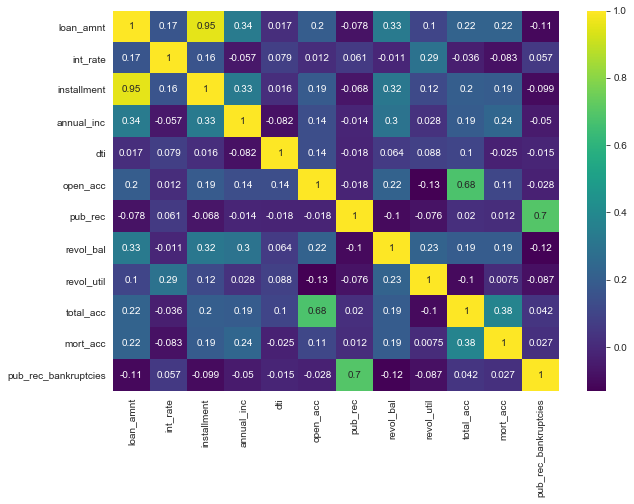

In [36]:
# A heatmap visulisation of the correlation between features

plt.figure(figsize = (10,7))
sns.heatmap(correlation, annot = True, cmap='viridis')

In the heatmap it can be seen that there is a correlation relationship between the installment and loan amount. Obviously the higher the loan amount the higher installments. 
But how does this relate to whether the customer will pay the loan or not?


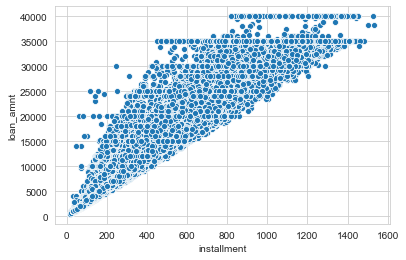

In [17]:
# Scatter plot showing correlation between installment and loan amount

sns.scatterplot(x='installment', y='loan_amnt',data=df)

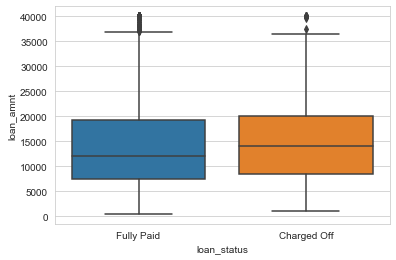

In [18]:
# The affect of the loan amount on the pay back of the load

sns.boxplot(x ='loan_status', y='loan_amnt',data=df)

In [19]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [20]:
# What are the possile grades?

print(df['grade'].unique())

['B' 'A' 'C' 'E' 'D' 'F' 'G']


In [21]:
#What are the possible subgrades?

print(df['sub_grade'].unique())

['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


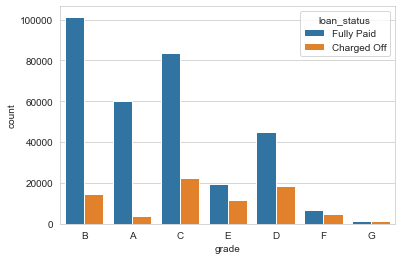

In [22]:
# Grades and Subgrades visulization

sns.countplot(x='grade', hue ='loan_status', data=df)

In this count plot it can be seen that the customers allocated to grades A,B,C are more likely to pay back the loan compared to the others, particularly, grades F and G

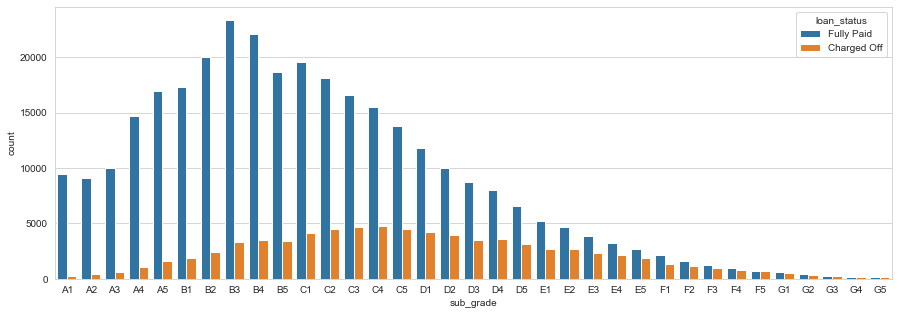

In [23]:
plt.figure(figsize = (15,5))

sub_grade_sorted = df.sort_values(by='sub_grade')
sns.countplot(x=df.sort_values(by='sub_grade')['sub_grade'], hue ='loan_status', data=df)

In [24]:
# Convert the loan_status to numerical values

loan_repaid = pd.get_dummies(df['loan_status'], drop_first = True) # values converted in new Series
df = pd.concat([df,loan_repaid], axis=1)  # Concatenate the series to the dataframe as a column
df.rename(columns = {'Fully Paid':'loan_repaid'}, inplace = True) # Rename column to loan_repaid

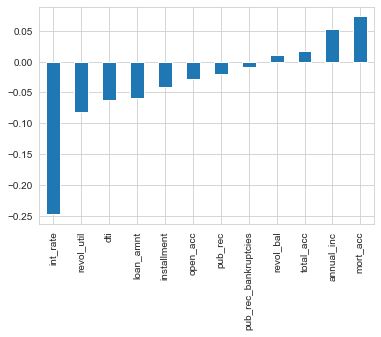

In [25]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar')

#### Note: Plots below have been created to support the feature engineering task

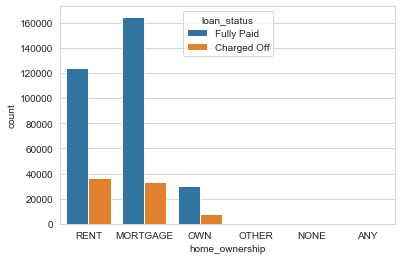

In [26]:
# Home Ownership

sns.countplot(x='home_ownership', hue ='loan_status', data=df)

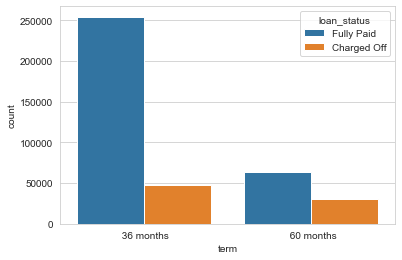

In [27]:
# Loan Term Time

sns.countplot(x='term', hue ='loan_status', data=df)

Customers on 36 month term contracts are more likely to pay back the loan

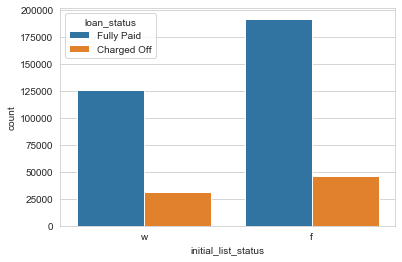

In [28]:
# Loan Term Time

sns.countplot(x='initial_list_status', hue ='loan_status', data=df)

## 3.0 Data Pre-Processing

1. Need to remove or fill any missing data. 
2. Remove unnecessary or repetitive features.
3. convert categorical string features to dummy variables.

### 3.1 Missing Data

In [29]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1


In [30]:
# The % of missing values for each feature

((df.isnull().sum()/len(df)) *100).sort_values(ascending = False)

mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443148
pub_rec_bankruptcies    0.135091
revol_util              0.069692
loan_repaid             0.000000
issue_d                 0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
purpose                 0.000000
loan_status             0.000000
address                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
loan_amnt               0.000000
dtype: float64

Need to work through the features with the missing values and determine we can drop the missing data or we need to fill it

In [33]:
# Remove features that cannot be used.

df.drop(['emp_title','emp_length','title' ], axis = 1, inplace = True)

In [34]:
df.corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

In [37]:
# Need to complete the missing data in mort_acc based on total_acc
# Mean of mort_acc column per total_acc
# This series will be used as a look up to fill the missing values in mort_acc

total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

Fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value.

In [38]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [39]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [41]:
# Check after missing data processing
# The % of missing values for each feature

df.isnull().sum().sort_values()

loan_amnt                 0
mort_acc                  0
application_type          0
initial_list_status       0
total_acc                 0
revol_bal                 0
pub_rec                   0
open_acc                  0
earliest_cr_line          0
address                   0
purpose                   0
dti                       0
issue_d                   0
verification_status       0
annual_inc                0
home_ownership            0
sub_grade                 0
grade                     0
installment               0
int_rate                  0
term                      0
loan_status               0
loan_repaid               0
revol_util              276
pub_rec_bankruptcies    535
dtype: int64

In [45]:
# Rows assoicated with revol_util and pub_rec_bankruptcies can be dropped
df = df.dropna()

In [46]:
# Check after missing data processing
# The % of missing values for each feature

df.isnull().sum().sort_values()

loan_amnt               0
pub_rec_bankruptcies    0
mort_acc                0
application_type        0
initial_list_status     0
total_acc               0
revol_util              0
revol_bal               0
pub_rec                 0
open_acc                0
earliest_cr_line        0
address                 0
dti                     0
loan_status             0
issue_d                 0
verification_status     0
annual_inc              0
home_ownership          0
sub_grade               0
grade                   0
installment             0
int_rate                0
term                    0
purpose                 0
loan_repaid             0
dtype: int64

### 3.2 Categorical and Dummy Variables

In [54]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1


In [53]:
# List of columns with non-numerical objects

df.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

#### term feature

In [60]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [61]:
# Removes 'months' from cells by pulling only the number

df['term'] = df['term'].apply(lambda term: int(term[:3]))

#### grade feature

In [62]:
# Grade feature is not required as the details are contained in sub_grade
df = df.drop('grade',axis=1)

#### sub_grade feature

In [63]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [64]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [65]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [66]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

#### verification_status, application_type, initial_list_status and purpose feature

In [67]:
# These feature can be converted to dummies/numerical data and concatenated to the DF

dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

#### home_ownership feature

In [68]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [69]:
# Convert home_ownership to dummy variables and replace NONE and ANY with OTHER, 
# so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. 
# Then concatenate them with the original dataframe.

df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

#### address feature

In [70]:
# zip code in address can be used as a feature.
# zip code is alwazs in same position, so it can be pulled out of the address

df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [74]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [75]:
# Convert the zip code to dummy variables

dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

#### issue_d feature

In [ ]:
# This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, 
# so in theory we wouldn't have an issue_date, drop this feature.

In [76]:
df = df.drop('issue_d',axis=1)

#### earliest_cr_line

In [ ]:
# Convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'

In [77]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [78]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

## 4.0 Model Building

1. Create the Train/Test split on the feature data
2. Normalize the data
3. Create the model
4. Evaluate Model Performance

### 4.1 Train Test Split

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
df = df.drop('loan_status',axis=1)

In [85]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### 4.2 Normalize the Data

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
scaler = MinMaxScaler()

In [87]:
X_train = scaler.fit_transform(X_train)

In [88]:
X_test = scaler.transform(X_test)

### 4.3 Creating the Model

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

C:\Users\Mike\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Mike\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Mike\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Mike\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [98]:
model = Sequential()

### Neural network layers and units chosen randomly

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [91]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 22s 68us/sample - loss: 0.3018 - val_loss: 0.2646
Epoch 2/25
316175/316175 [==============================] - 14s 44us/sample - loss: 0.2657 - val_loss: 0.2632
Epoch 3/25
316175/316175 [==============================] - 14s 45us/sample - loss: 0.2631 - val_loss: 0.2627
Epoch 4/25
316175/316175 [==============================] - 14s 45us/sample - loss: 0.2619 - val_loss: 0.2625
Epoch 5/25
316175/316175 [==============================] - 14s 44us/sample - loss: 0.2611 - val_loss: 0.2619
Epoch 6/25
316175/316175 [==============================] - 13s 41us/sample - loss: 0.2605 - val_loss: 0.2614
Epoch 7/25
316175/316175 [==============================] - 14s 43us/sample - loss: 0.2600 - val_loss: 0.2616
Epoch 8/25
316175/316175 [==============================] - 13s 42us/sample - loss: 0

### 4.4 Evaluating Model Performance

In [92]:
losses = pd.DataFrame(model.history.history)

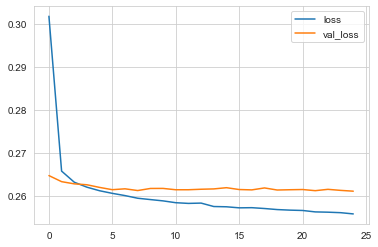

In [93]:
losses[['loss','val_loss']].plot()

In [94]:
from sklearn.metrics import classification_report,confusion_matrix

In [95]:
predictions = model.predict_classes(X_test)

In [96]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.46      0.62     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.73      0.78     79044
weighted avg       0.90      0.89      0.87     79044



In [97]:
confusion_matrix(y_test,predictions)

array([[ 7145,  8513],
       [  329, 63057]], dtype=int64)

#### The metrics produced by the classification report shows that the model performance is not great. 
#### This could be improved with Early Stopping

In [101]:
model = Sequential()

### Neural network layers and units chosen randomly

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [103]:
# Add Early stopping to stop the model fitting before the validation error starts to grow
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose = 1, patience = 25)

In [104]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop])

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 16s 52us/sample - loss: 0.2961 - val_loss: 0.2644
Epoch 2/25
316175/316175 [==============================] - 13s 42us/sample - loss: 0.2651 - val_loss: 0.2628
Epoch 3/25
316175/316175 [==============================] - 14s 43us/sample - loss: 0.2628 - val_loss: 0.2625
Epoch 4/25
316175/316175 [==============================] - 16s 51us/sample - loss: 0.2619 - val_loss: 0.2626
Epoch 5/25
316175/316175 [==============================] - 14s 43us/sample - loss: 0.2609 - val_loss: 0.2619
Epoch 6/25
316175/316175 [==============================] - 14s 43us/sample - loss: 0.2604 - val_loss: 0.2615
Epoch 7/25
316175/316175 [==============================] - 14s 45us/sample - loss: 0.2599 - val_loss: 0.2616
Epoch 8/25
316175/316175 [==============================] - 13s 42us/sample - loss: 0.2598 - val_loss: 0.2615
Epoch 9/25
316175/316175 [==============================] - 14s 43us/

In [105]:
 losses_earlystop = pd.DataFrame(model.history.history)

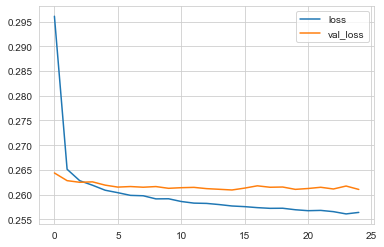

In [108]:
losses_earlystop[['loss','val_loss']].plot()

In [109]:
predictions = model.predict_classes(X_test)

In [110]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.44      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [111]:
confusion_matrix(y_test,predictions)

array([[ 6833,  8825],
       [   99, 63287]], dtype=int64)